# `stat_summary()`/`stat_summary_bin()`

In [1]:
library(ggplot2)

### 1. `geom='pointrange'`

In [2]:
df <- data.frame(
    x = c(0, 0, 1, 1, 1, 1),
    y = c(-1, 1, 0, 1, 1, 2)
)

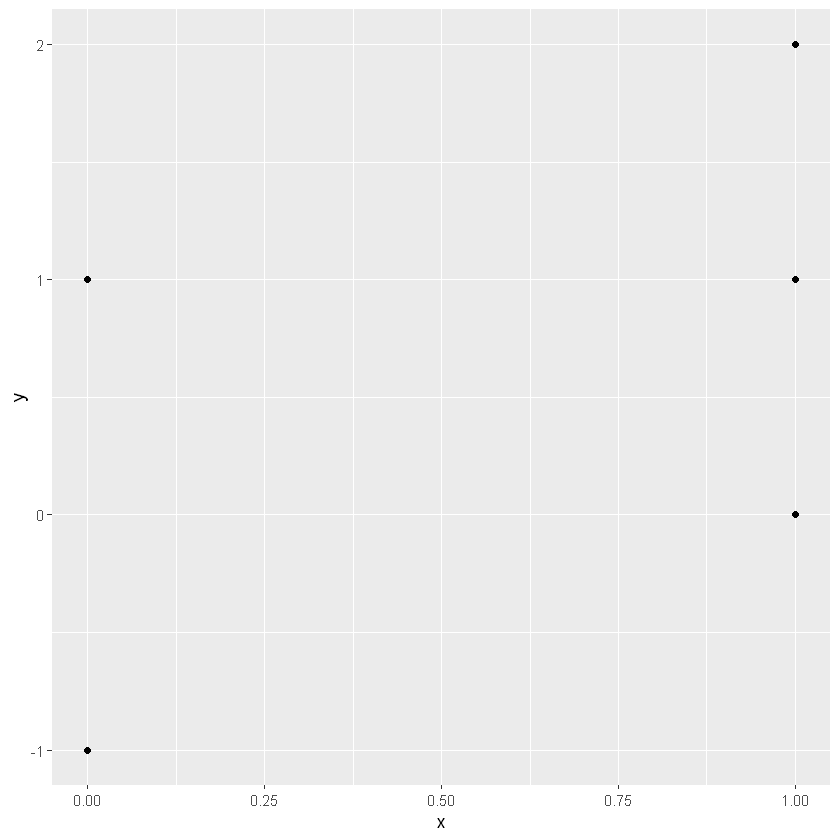

In [3]:
p <- ggplot(df, aes(x, y)) + geom_point()
p

No summary function supplied, defaulting to `mean_se()`


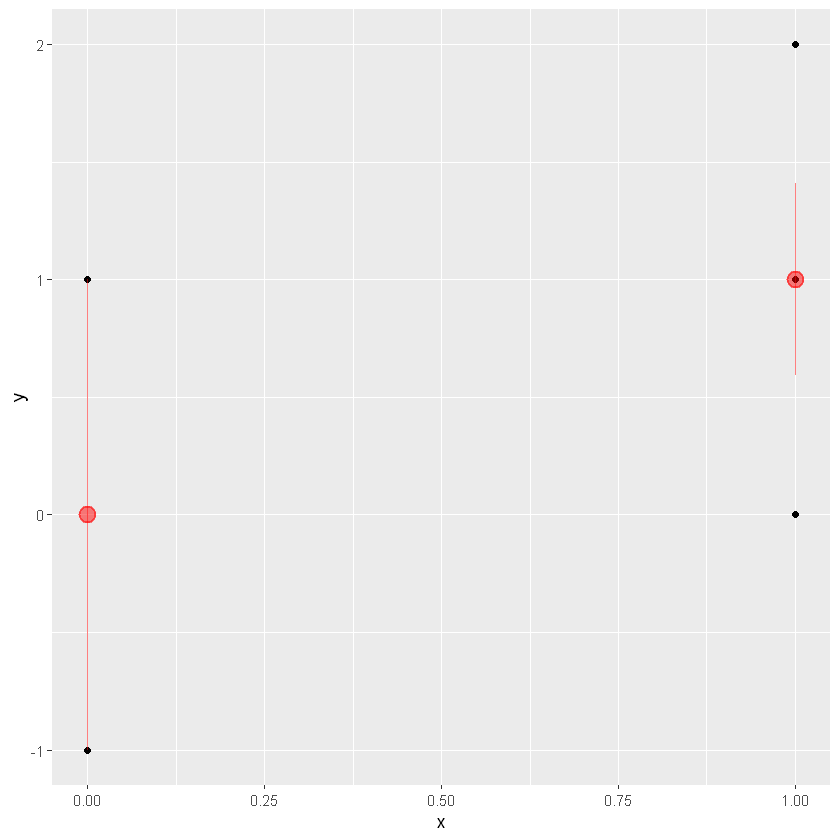

In [4]:
p + stat_summary(color = "red", size = 1, alpha = .5)

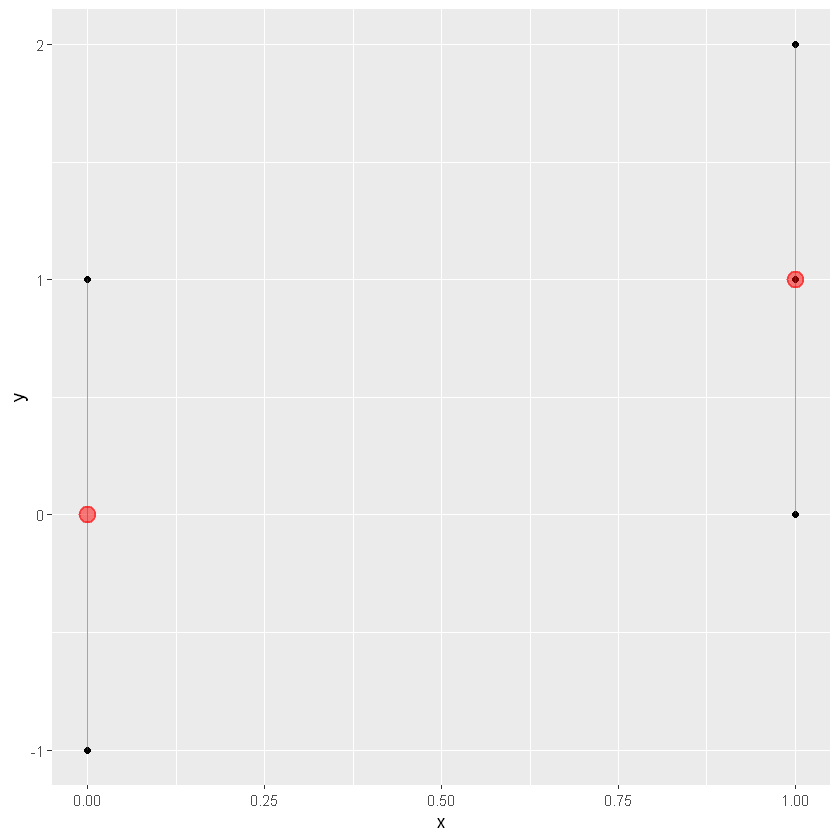

In [5]:
p + stat_summary(fun = "mean", fun.min = "min", fun.max = "max", color = "red", size = 1, alpha = .5)

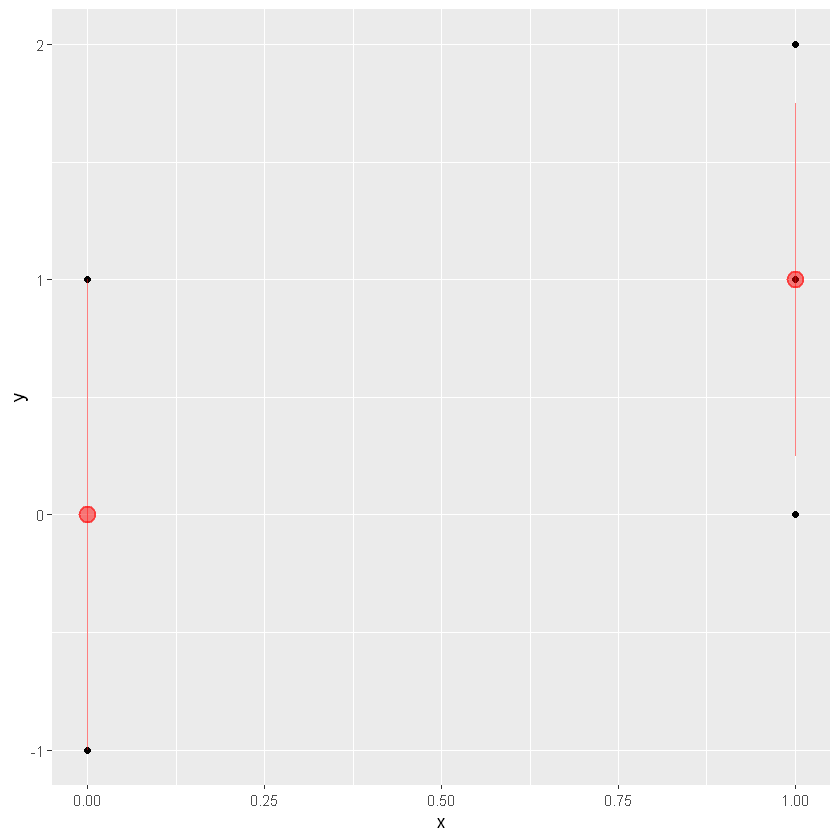

In [6]:
p + stat_summary(fun.data = "mean_cl_boot", color = "red", size = 1, alpha = .5)

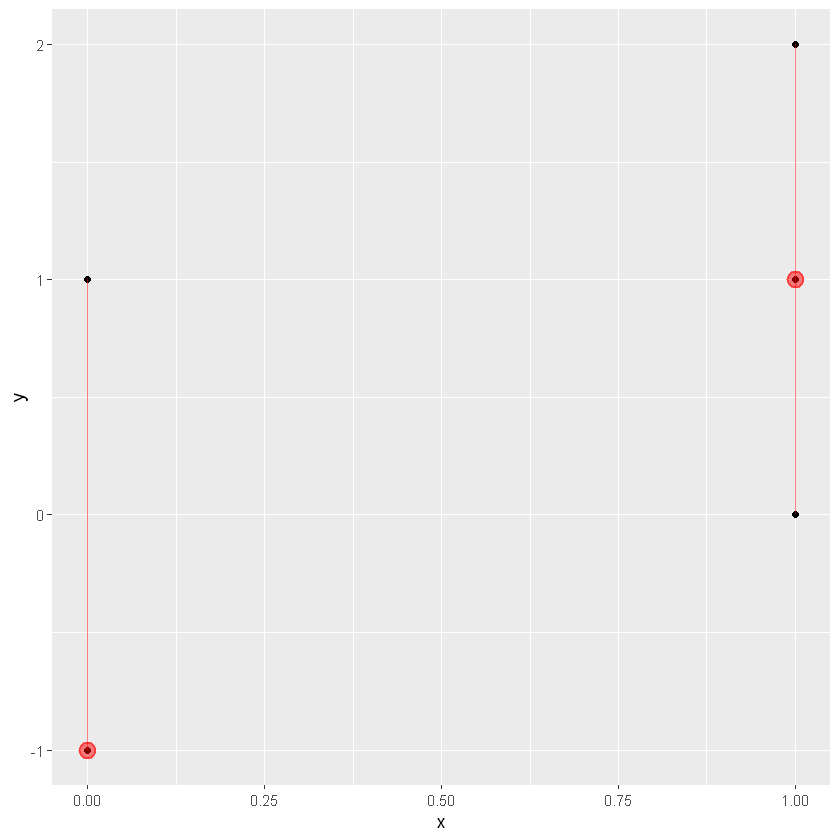

In [7]:
my_mode <- function(v) {
   uniqv <- unique(v)
   uniqv[which.max(tabulate(match(v, uniqv)))]
}

my_fun_data <- function(x) {
    data.frame(
        y = my_mode(x),
        ymin = min(x),
        ymax = max(x)
    )
}

p + stat_summary(fun.data = my_fun_data, color = "red", size = 1, alpha = .5)

### 2. `geom='boxplot'`

In [8]:
box_fun_data <- function(x, middle_is_median = TRUE) {
    middle_fun <- if (middle_is_median) median else mean
    data.frame(
        ymin = as.numeric(quantile(x, probs = c(0.05))),
        lower = as.numeric(quantile(x, probs = c(0.25))),
        middle = middle_fun(x),
        upper = as.numeric(quantile(x, probs = c(0.75))),
        ymax = as.numeric(quantile(x, probs = c(0.95)))
    )
}

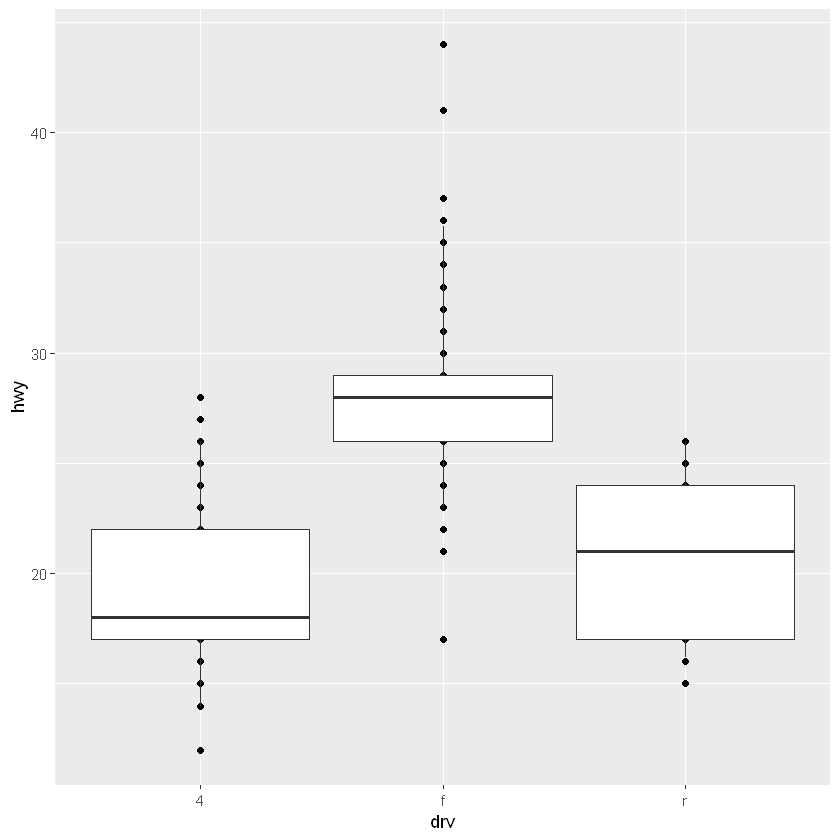

In [9]:
ggplot(mpg, aes(drv, hwy)) +
    geom_point() +
    stat_summary(fun.data = box_fun_data, geom = "boxplot")

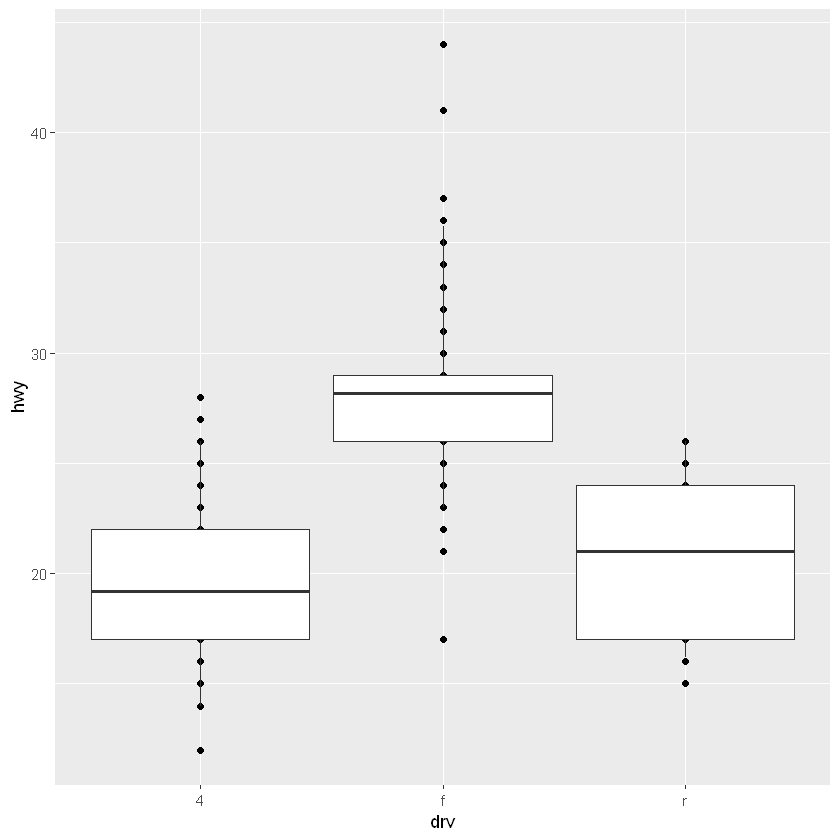

In [10]:
ggplot(mpg, aes(drv, hwy)) +
    geom_point() +
    stat_summary(fun.data = box_fun_data, fun.args = list(middle_is_median = FALSE), geom = "boxplot")

### 3. `geom='histogram'`

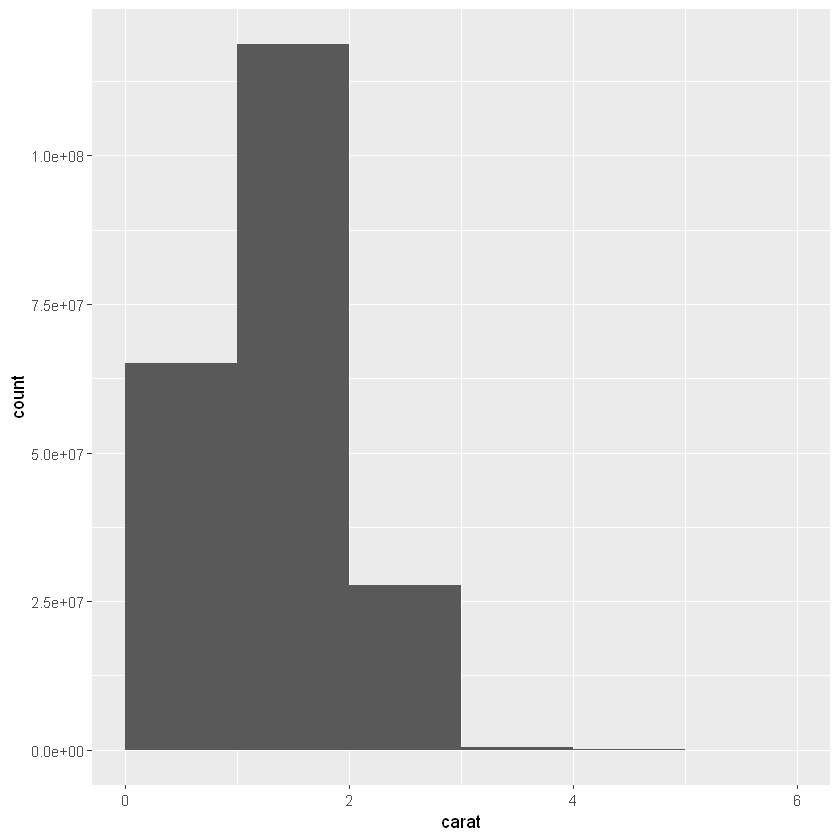

In [11]:
ggplot(diamonds, aes(carat)) +
    geom_histogram(aes(weight = price), binwidth = 1, boundary = 0)

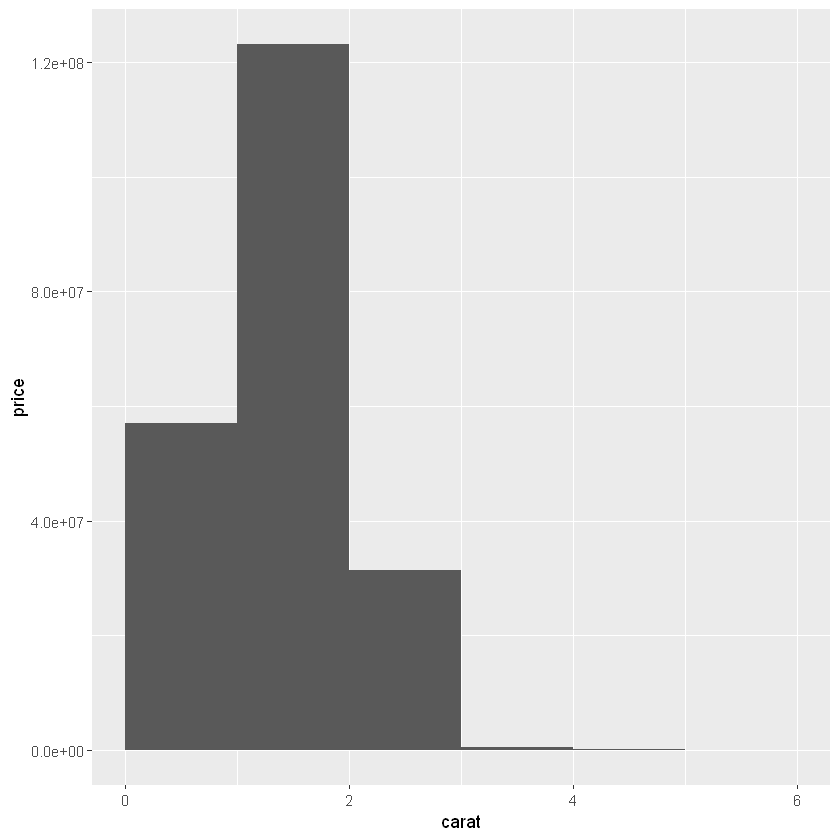

In [12]:
ggplot(diamonds, aes(carat, price)) +
    stat_summary_bin(fun = "sum", geom = "bar", binwidth = 1)

### 4. Defaults

No summary function supplied, defaulting to `mean_se()`
Warning message:
"Removed 3 rows containing missing values (`geom_segment()`)."
Warning message:
"Removed 3 rows containing missing values (`geom_segment()`)."


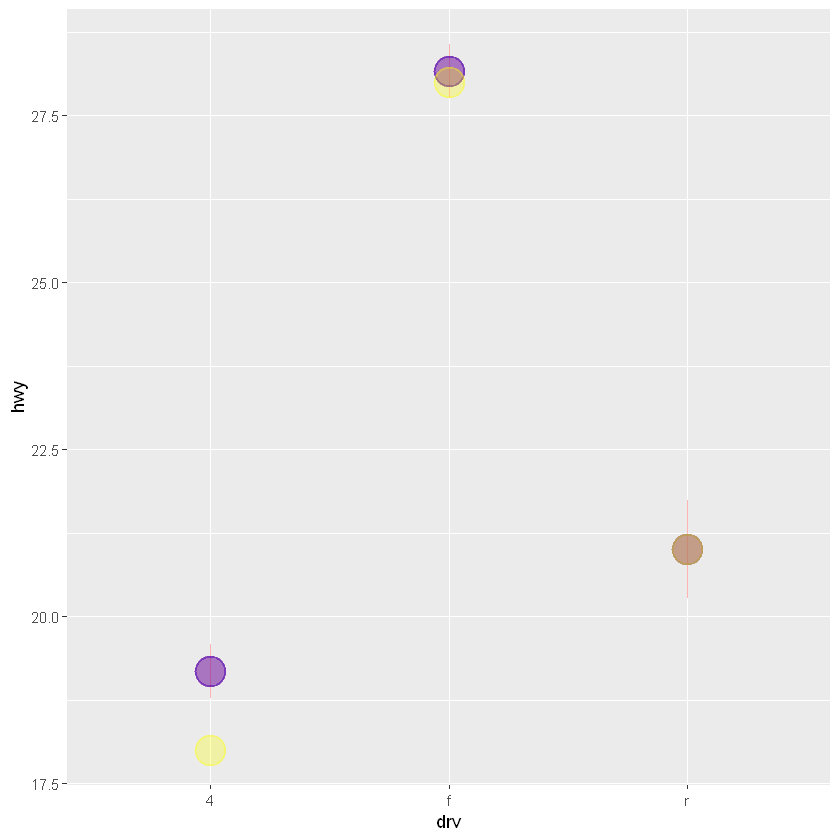

In [13]:
ggplot(mpg, aes(drv, hwy)) +
    stat_summary(color = "red", size = 2, alpha = .3) +
    stat_summary(fun = "mean", color = "blue", size = 2, alpha = .3) +
    stat_summary(fun = "median", color = "yellow", size = 2, alpha = .3)